In [2]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score
from time import time
from operator import itemgetter
from scipy.stats import randint
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.cross_validation import  cross_val_score
import os
import subprocess
from time import time
from operator import itemgetter
from scipy.stats import randint
import pandas as pd
from sklearn.ensemble import BaggingClassifier
import numpy as np
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.metrics import f1_score


filename = 'df_imputed_scaled_OHE_reducedv1.pkl'



#filename = 'df_imputed_tot_OHE.pkl'
df = pd.read_pickle(filename)
X = df[df.columns[:-1]]
y = pd.Series(df['heartdisease'])
train_X,test_X,train_y,test_y =train_test_split(X,y,test_size=0.33,shuffle = True, random_state=45)
pprint('--Data splitted done')

'--Data splitted done'


/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/javi_fdez_093/.local/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
def report(grid_scores, n_top=3):
    """Report top n_top parameters settings, default n_top=3.

    Args
    ----
    grid_scores -- output from grid or random search
    n_top -- how many to report, of top models

    Returns
    -------
    top_params -- [dict] top parameter settings found in
                  search
    """
    top_scores = sorted(grid_scores,
                        key=itemgetter(1),
                        reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print(("Mean validation score: "
               "{0:.3f} (std: {1:.3f})").format(
               score.mean_validation_score,
               np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

    return top_scores[0].parameters

In [4]:
def run_randomsearch(X, y, clf, para_dist, cv=5,
                     n_iter_search=100):
    """Run a random search for best Decision Tree parameters.

    Args
    ----
    X -- features
    y -- targets (classes)
    cf -- scikit-learn Decision Tree
    param_dist -- [dict] list, distributions of parameters
                  to sample
    cv -- fold of cross-validation, default 5
    n_iter_search -- number of random parameter sets to try,
                     default 20.

    Returns
    -------
    top_params -- [dict] from report()
    """
    random_search = RandomizedSearchCV(clf,
                        param_distributions=param_dist,
                        n_iter=n_iter_search, n_jobs= -1)

    start = time()
    random_search.fit(X, y)
    print(("\nRandomizedSearchCV took {:.2f} seconds "
           "for {:d} candidates parameter "
           "settings.").format((time() - start),
                               n_iter_search))

    top_params = report(random_search.grid_scores_, 3)
    return  top_params

In [8]:
#Building Models according to the best hyperparameters
#found by RandomSearchCV
#Building Models according to the best hyperparameters
#found by RandomSearchCV
from sklearn.ensemble import ExtraTreesClassifier
model_Linear_SVM=svm.SVC(kernel='linear',C=0.1,gamma=1e-05, probability=True)

model_RBF_SVM = svm.SVC(kernel='rbf',C=10,gamma=0.01, probability=True)
model_Logistic_Regression = LogisticRegression(penalty= 'l2', C = 1, solver = 'lbfgs') 


model_Decision_Tree =DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')

'''
-- Best Parameters: DT_randomSEARCH
parameters: max_depth            setting: 1
parameters: min_samples_split    setting: 4
parameters: max_leaf_nodes       setting: 8
parameters: min_samples_leaf     setting: 13
parameters: criterion            setting: gini
'''

    
    
model_RandomForest = RandomForestClassifier(n_estimators= 600,
               max_features= 'sqrt',
               max_depth= 30,
               min_samples_split= 2,
               min_samples_leaf= 4,
               bootstrap= True)
model_RandomForest
model_extraTrees = ExtraTreesClassifier(n_estimators= 1600,
               max_features= 'sqrt',
               max_depth= 50,
               min_samples_split= 2,
               min_samples_leaf= 2,
               bootstrap= True)



model_KNN = KNeighborsClassifier(n_neighbors=22)



pprint('--------FINISH MODELS CREATED')

'--------FINISH MODELS CREATED'


In [6]:
# dict of parameter list/distributions to sample
n_estimators_search=list(range(100,1100,100))
param_dist = {"n_estimators": n_estimators_search}

pprint('----Random Search Decision Tree\n')
bagged_DT = BaggingClassifier(base_estimator=model_Decision_Tree, random_state = 34)
DT_rs = run_randomsearch(X, y, bagged_DT, param_dist, cv=10,
                         n_iter_search=10)



pprint('----Random Search SVM_Linear\n')
bagged_SVM_Linear = BaggingClassifier(base_estimator=model_Linear_SVM, random_state = 36)
SVM_Linear_rs = run_randomsearch(X, y, bagged_SVM_Linear, param_dist, cv=10,
                         n_iter_search=10)



pprint('----Random Search SVM_RBF\n')
bagged_SVM_RBF = BaggingClassifier(base_estimator=model_RBF_SVM, random_state = 37)
SVM_RBF_rs = run_randomsearch(X, y, bagged_SVM_RBF, param_dist, cv=10,
                         n_iter_search=10)


pprint('----Random Search Logistic_Regression\n')
bagged_Logistic_Regression = BaggingClassifier(base_estimator=model_Logistic_Regression, random_state = 38)
Logistic_Regression_rs = run_randomsearch(X, y, bagged_Logistic_Regression, param_dist, cv=10,
                         n_iter_search=10)




pprint('----Random Search K = 22 - NN\n')
bagged_model_KNN= BaggingClassifier(base_estimator=model_KNN, random_state = 38)
model_KNN_rs = run_randomsearch(X, y, bagged_model_KNN, param_dist, cv=10,
                         n_iter_search=10)

ExtraTreesClassifier()
Parameters: {'min_samples_split': 2, 'max_features': 'sqrt', 'n_estimators': 600, 'bootstrap': True, 'min_samples_leaf': 4, 'max_depth': 30}





'----Random Search Decision Tree\n'

RandomizedSearchCV took 4.88 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.778 (std: 0.019)
Parameters: {'n_estimators': 800}

Model with rank: 2
Mean validation score: 0.778 (std: 0.019)
Parameters: {'n_estimators': 900}

Model with rank: 3
Mean validation score: 0.778 (std: 0.019)
Parameters: {'n_estimators': 1000}

'----Random Search SVM_Linear\n'

RandomizedSearchCV took 64.20 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.801 (std: 0.019)
Parameters: {'n_estimators': 400}

Model with rank: 2
Mean validation score: 0.800 (std: 0.020)
Parameters: {'n_estimators': 300}

Model with rank: 3
Mean validation score: 0.800 (std: 0.018)
Parameters: {'n_estimators': 500}

'----Random Search SVM_RBF\n'

RandomizedSearchCV took 109.50 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.800 (std: 0.017)
Parameters: {'n_estimators': 200

In [10]:
bagged_DT_model = BaggingClassifier(base_estimator= model_Decision_Tree, n_estimators =  800, random_state = 34)
bagged_SVM_Linear_model = BaggingClassifier(base_estimator=model_Linear_SVM, n_estimators =  400, random_state = 36)
bagged_SVM_RBF_model =  BaggingClassifier(base_estimator=model_RBF_SVM, n_estimators =  200 ,random_state = 37)
bagged_Logistic_Regression_model = BaggingClassifier(base_estimator=model_Logistic_Regression,  n_estimators =  300, random_state = 38)
bagged_model_KNN= BaggingClassifier(base_estimator=model_KNN, n_estimators =  100, random_state = 38)


In [12]:
from sklearn.model_selection import KFold,StratifiedKFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score, cross_validate #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.metrics.scorer import make_scorer
from IPython.display import display, HTML


scoring = {'precision': make_scorer(precision_score),
           'recall': make_scorer(recall_score),
           'F-score': make_scorer( f1_score),
           'accuracy': make_scorer(accuracy_score)}

kfold = StratifiedKFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts

classifiers=['Linear SVM','Radial SVM','Logistic Regression','KNN','Decision Tree','Random Forest', 'Extremly Randomized Trees']
models=[bagged_SVM_Linear_model, bagged_SVM_RBF_model, bagged_Logistic_Regression_model, bagged_model_KNN, bagged_DT_model, model_RandomForest, model_extraTrees]



fit_time = []
score_time = []

test_accuracy = []
test_accuracy_total = []

test_accuracy_std = []
train_accuracy = []
train_accuracy_total = []
train_accuracy_std = []


test_F_score = []
test_F_score_total = []


test_F_score_std = []
train_F_score = []
train_F_score_total = []

train_F_score_std = []


test_precision = []
test_precision_std = []
train_precision = []
train_precision_std = []


test_recall = []
test_recall_std = []
train_recall = []
train_recall_std = []









for i in models:
    model = i
    scores = cross_validate(model,X,y, cv = kfold, scoring = scoring, return_train_score=True)
    fit_time.append(scores['fit_time'].mean())
    score_time.append(scores['score_time'].mean())
    
    test_accuracy.append(scores['test_accuracy'].mean())
    test_accuracy_total.append(scores['test_accuracy'])
    
    test_accuracy_std.append(scores['test_accuracy'].std())
    train_accuracy.append(scores['train_accuracy'].mean())
    train_accuracy_total.append(scores['train_accuracy'])
                          
    train_accuracy_std.append(scores['train_accuracy'].std())
    
    test_F_score.append(scores['test_F-score'].mean())
    test_F_score_total.append(scores['test_F-score'])
    
    test_F_score_std.append(scores['test_F-score'].std())
    train_F_score.append(scores['train_F-score'].mean())
    train_F_score_total.append(scores['train_F-score'])
                         
                         
    train_F_score_std.append(scores['train_F-score'].std())
    
    test_precision.append(scores['test_precision'].mean())
    test_precision_std.append(scores['test_precision'].std())
    train_precision.append(scores['train_precision'].mean())
    train_precision_std.append(scores['train_precision'].std())
    
    test_recall.append(scores['test_recall'].mean())
    test_recall_std.append(scores['test_recall'].std())
    train_recall.append(scores['train_recall'].mean())
    train_recall_std.append(scores['train_recall'].std())
    

    print('Model: ' + str(i))

sorted(scores.keys())     
dct_acc = {'Test_accuracy':test_accuracy,
               'Test_accuracy_std':test_accuracy_std,
               'Train_accuracy':train_accuracy,
               'Train_accuracy_std':train_accuracy_std, }
dct_Fscore = {'Test_F_score':test_F_score,
               'Test_F_score_std':test_F_score_std,
               'Train_F_score': train_F_score,
               'Train_F_score_std': train_F_score_std}
dct_precision = {'Test_precision': test_precision,
               'Test_precision_std': test_precision_std,
               'Train_precision': train_precision,
               'Train_precision_std': train_precision_std}
dct_recall = {'Test_Sensitivity': test_recall, 
               'Test_Sensitivity_std': test_recall_std,
               'Train_Sensitivity': train_recall,
               'Train_Sensitivity_std': train_recall_std}
dct_time = {'Fit_time': fit_time, 'Scoring Time':score_time}

metrics_acc=pd.DataFrame(dct_acc,index=classifiers)       
metrics_Fsc = pd.DataFrame(dct_Fscore,index=classifiers)
metrics_precision = pd.DataFrame(dct_precision,index=classifiers) 
metrics_recall = pd.DataFrame(dct_recall,index=classifiers)
metrics_time = pd.DataFrame(dct_time,index=classifiers)
           
display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)



Model: BaggingClassifier(base_estimator=SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=400, n_jobs=1, oob_score=False,
         random_state=36, verbose=0, warm_start=False)
Model: BaggingClassifier(base_estimator=SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=200, n_jobs=1, oob_score=False,
         random_state=37, verbose=0, warm_start=False)
Model: BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None

,Test_accuracy,Test_accuracy_std,Train_accuracy,Train_accuracy_std
Linear SVM,0.793354,0.050108,0.802776,0.007073
Radial SVM,0.794488,0.058625,0.817511,0.008069
Logistic Regression,0.789030,0.052980,0.801810,0.005439
KNN,0.793365,0.068825,0.821737,0.008514
Decision Tree,0.770622,0.054411,0.790338,0.007124
Random Forest,0.791192,0.059459,0.895167,0.004769
Extremly Randomized Trees,0.785804,0.057514,0.850238,0.009408


,Test_F_score,Test_F_score_std,Train_F_score,Train_F_score_std
Linear SVM,0.817013,0.036322,0.825599,0.005912
Radial SVM,0.819183,0.048181,0.840565,0.006938
Logistic Regression,0.813135,0.040950,0.824516,0.004524
KNN,0.823580,0.051651,0.846379,0.007212
Decision Tree,0.792757,0.047279,0.810716,0.006415
Random Forest,0.817117,0.047275,0.908224,0.004172
Extremly Randomized Trees,0.815891,0.041631,0.870211,0.008482


,Test_precision,Test_precision_std,Train_precision,Train_precision_std
Linear SVM,0.813732,0.071471,0.808286,0.007887
Radial SVM,0.807287,0.072125,0.813544,0.007725
Logistic Regression,0.809729,0.074495,0.808216,0.006447
KNN,0.795080,0.080578,0.808925,0.009453
Decision Tree,0.796913,0.061411,0.810068,0.011170
Random Forest,0.803728,0.072220,0.880689,0.005219
Extremly Randomized Trees,0.790818,0.073776,0.835767,0.006782


,Test_Sensitivity,Test_Sensitivity_std,Train_Sensitivity,Train_Sensitivity_std
Linear SVM,0.829255,0.064245,0.843700,0.005414
Radial SVM,0.839059,0.070951,0.869460,0.006976
Logistic Regression,0.827333,0.077173,0.841519,0.004814
KNN,0.866627,0.086668,0.887579,0.010068
Decision Tree,0.791843,0.055317,0.811614,0.012646
Random Forest,0.841137,0.081465,0.937567,0.005883
Extremly Randomized Trees,0.850902,0.061368,0.907659,0.011983


,Fit_time,Scoring Time
Linear SVM,9.181752,0.809238
Radial SVM,9.371809,0.966824
Logistic Regression,2.048561,0.076237
KNN,0.125402,0.990559
Decision Tree,0.998767,0.200833
Random Forest,0.959309,0.163245
Extremly Randomized Trees,2.038716,0.439435


In [ ]:

display(metrics_acc)
display(metrics_Fsc)
display(metrics_precision)
display(metrics_recall)
display(metrics_time)

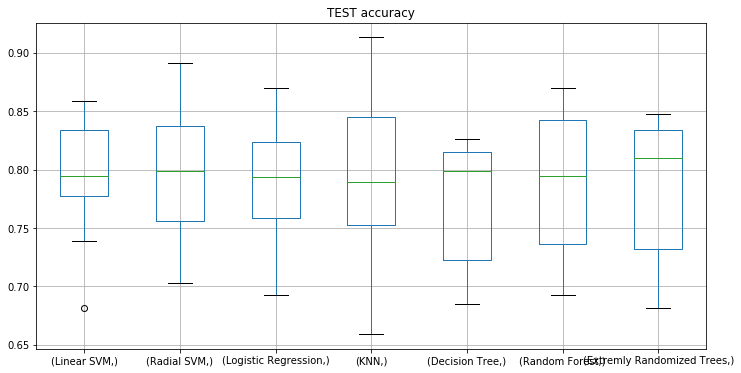

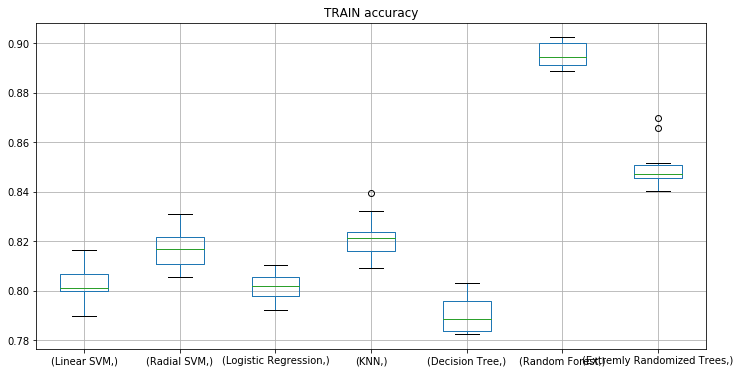

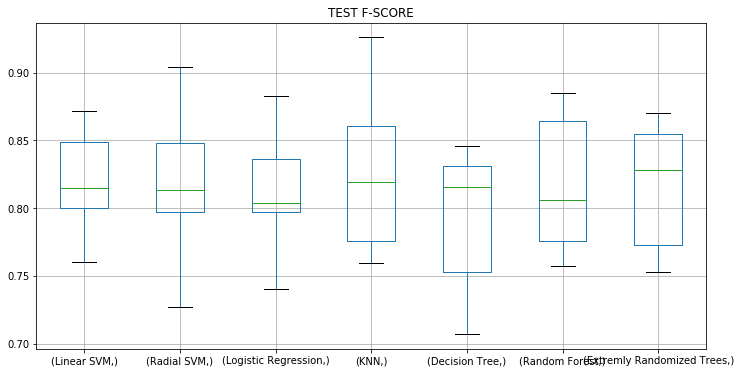

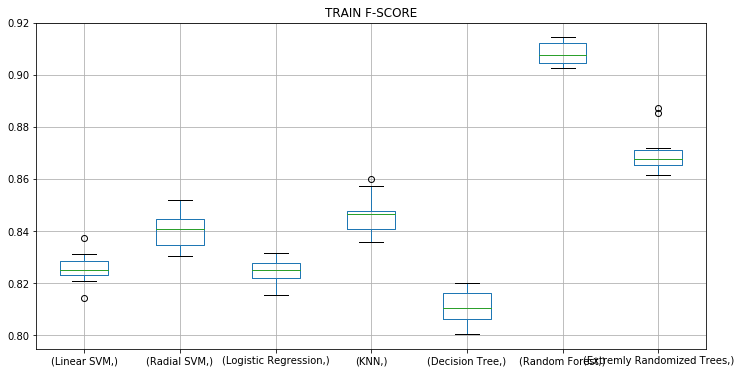

In [13]:
plt.figure(figsize=(12,6))
plt.title('TEST accuracy')
box_test_accuracy=pd.DataFrame(test_accuracy_total,index=[classifiers])
box_test_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN accuracy')
box_train_accuracy=pd.DataFrame(train_accuracy_total,index=[classifiers])
box_train_accuracy.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TEST F-SCORE')
box_test_F_score=pd.DataFrame(test_F_score_total,index=[classifiers])
box_test_F_score.T.boxplot()
plt.show()
plt.figure(figsize=(12,6))
plt.title('TRAIN F-SCORE')
box_train_F_score=pd.DataFrame(train_F_score_total,index=[classifiers])
box_train_F_score.T.boxplot()
plt.show()




f,ax=plt.subplots(2,3,figsize=(12,6))
y_pred = cross_val_predict(bagged_SVM_RBF_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(bagged_SVM_Linear_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(bagged_model_KNN,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(rfc_best,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(bagged_Logistic_Regression_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(bagged_DT_model,X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
plt.show()

[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]
[Fold 1/10]
[Fold 2/10]
[Fold 3/10]
[Fold 4/10]
[Fold 5/10]
[Fold 6/10]
[Fold 7/10]
[Fold 8/10]
[Fold 9/10]
[Fold 10/10]


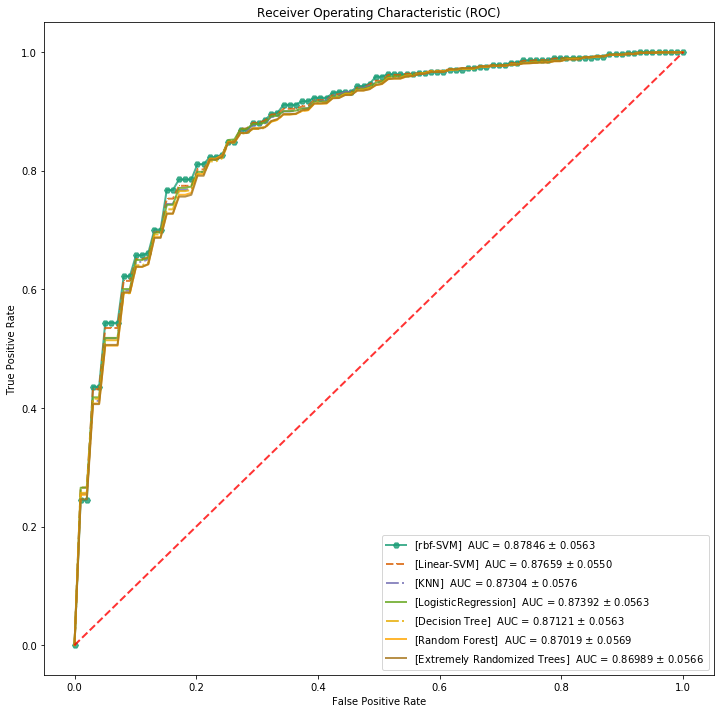

,AUC Mean,std
rbf-SVM,0.878462,0.056310
Linear-SVM,0.876589,0.055048
KNN,0.873045,0.057570
LogisticRegression,0.873924,0.056316
Decision Tree,0.871214,0.056316
Random Forest,0.870190,0.056945
Extremely Randomized Trees,0.869888,0.056627


In [16]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

#'aqua', 'darkorange', 'cornflowerblue'
models = [
    {
        'label' : 'rbf-SVM',
        'model': bagged_SVM_RBF_model,
        'color': '#1b9e77',
        'linestyle': 'solid', 
        'markers': 'H',
         
    },
    {
        'label' : 'Linear-SVM',
        'model': bagged_SVM_Linear_model,
        'color': '#d95f02',
        'linestyle': 'dashed',
        'markers': ',',
    },
    {
        'label' : 'KNN',
        'model': bagged_model_KNN, 
        'color': '#7570b3',
        'linestyle': 'dashdot',
        'markers': '',
    },    
    {
        'label' : 'LogisticRegression',
        'model': bagged_Logistic_Regression_model,
        'color': '#66a61e',
        'linestyle': '-',
        'markers': ''
 
    },
    {
        'label' : 'Decision Tree',
        'model': bagged_DT_model, 
        'color': '#e6ab02',
        'linestyle': '-.',
        'markers': ''
    },
    {
        'label' : 'Random Forest',
        'model': model_RandomForest, 
        'color': 'orange',
        'linestyle': '-',
        'markers': ''
    },
    {
        'label' : 'Extremely Randomized Trees',
        'model': model_extraTrees, 
        'color': '#a6761d',
        'linestyle': '-',
        'markers': ''
    },
    

]







# #############################################################################
# Classification and ROC analysis
random_state = np.random.RandomState(0)
# Run classifier with cross-validation and plot ROC curves
splits = 10
cv = StratifiedKFold(n_splits=splits)


tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

aucs_mean = []
labels = []
std_mean = []


   


plt.figure(figsize=(12,12))
for m in models:
    i = 0
    for i,(train_index, test_index) in enumerate(cv.split(X, y)):
        
        print('[Fold %d/%d]' % (i + 1, splits))
        #print("TRAIN:", train_index, "\nTEST:", test_index)
        train_X = X.iloc[train_index]
        train_y = y.iloc[train_index]
        test_X = X.iloc[test_index]
        test_y = y.iloc[test_index]
        probas_ = m['model'].fit(train_X, train_y).predict_proba(test_X)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(test_y, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        #plt.plot(fpr, tpr, lw=1, alpha=0.3,
        #         label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)

    plt.plot(mean_fpr, mean_tpr, color= m['color'], linestyle = m['linestyle'], marker= m['markers'],
             label=r'[%s]  AUC = %0.5f $\pm$ %0.4f ' % (m['label'] ,mean_auc, std_auc),
             lw=2, alpha=.8)

    aucs_mean.append(mean_auc)
    std_mean.append(std_auc)
    labels.append(m['label']) 
    



    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                    # label=r'$\pm$ 1 std. dev.')
    
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)
plt.show()
AUCs=pd.DataFrame({'AUC Mean':aucs_mean, 'std':std_mean },index = labels)       
AUCs



